Basic interpolation, _por favor_! 

In [32]:
from numpy import zeros_like, arange, exp
from matplotlib.pyplot import plot, subplot;

import sys, os; sys.path.insert(0, os.path.abspath('..'))
from auxiliary import splot
from interpolation import Π, Λ, ϕ, ξ; Ω = lambda x: (1 - x*x) * Π(x/2)   # "Some functions are more equal than others"

# Ready...
N, ψ  = 10, Λ
# Set...                              #(exp(-.125(x - (N - 1)/2)**2))
x = arange(-1, N, 0.001); f = lambda x: (x - (N - 1)/2)**3
# Samples of 'f' at integers
f_ = [f(n) for n in range(N)]
# Interpolation functions 'ψ(x)', translated by 'n':
Ψ = [ψ(x - n) for n in range(N)] #

Now, let's try something elementary, and I **mean** it: ¡really e-l-e-m-e-n-t-a-r-y!  
Let's *"connect the dots"*, and let's do it ***literally***!

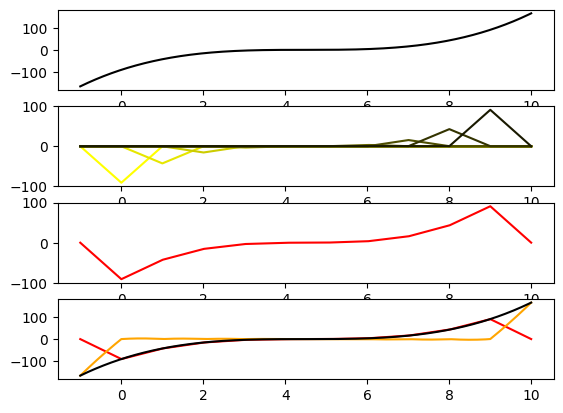

In [33]:
# Go!
C = [(1 - n/N, 1 - n/N, 0) for n in range(N)] # For color's sake!

# 🏁 Interpolation 'f(n) ➞ f(x)'🏁
subplot(4, 1, 1)
splot(x, f(x), 'black')
subplot(4, 1, 2)
f__ = zeros_like(x)
for n, (c, ψ) in enumerate(zip(C, Ψ)):
    _ = ψ * f_[n]
    f__ += _
    splot(x, _, color = c)
# The interpolation
subplot(4, 1, 3)
splot(x, f__, 'red')
# Together with its (¿¡inevitable!?) errors 'f(x) - f(n)', against the actual 'f(x)'
subplot(4, 1, 4)
splot(x, f__, 'red', x, f(x) - f__, 'orange', x, f(x) , 'black')

> ♪♫
> _Slow down, you move too fast,_<br>
> _you got to make the morning last_  
> _Just kicking down **the cobble stones**,_<br>
> _looking for fun and [feelin' groovy](https://youtu.be/So0ZrTwf8vI?t=22)..._
> ♫♪

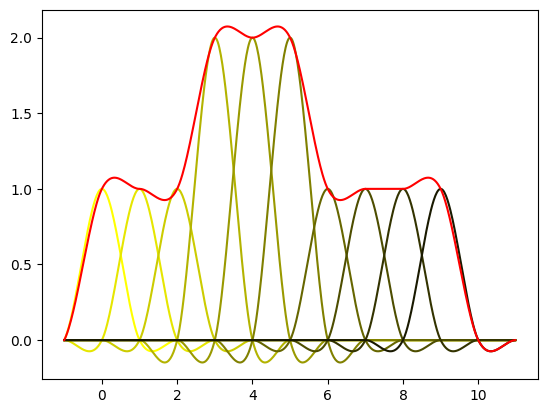

In [34]:
# Go, go, go! (a step-by-step-loop-free version is fun as well...)
f_, ψ = [1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1], ϕ  # Π, Λ, ϕ, ξ;
x = arange(-1, len(f_), 0.02)
Ψ = [f_[0]*ψ(x-0),f_[1]*ψ(x-1),f_[2]*ψ(x-2),f_[3]*ψ(x-3),
     f_[4]*ψ(x-4),f_[5]*ψ(x-5),f_[6]*ψ(x-6),f_[7]*ψ(x-7),
     f_[8]*ψ(x-8),f_[9]*ψ(x-9),f_[10]*ψ(x-10)]

f__ = zeros_like(x)
for c, ψ in zip(C, Ψ):
    splot(x, ψ, color = c)
    f__ += ψ
splot(x, f__, color = 'red')

In [35]:
f_, len(f_)

([1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1], 11)

On **Monday, November the 4th, at 11:15AM**, we (extraordinary kindly) asked Copilot for a favor (*i.e.* to translate the formula into a code): 
$$
f\left(  x\right)  =\sum_{n=0}^{N-1}f\left(  n\right)  \varphi\left(
x-n\right)
$$
... and we were given it readily. The question is **when** (rather than **if**) will we have to return the favor!

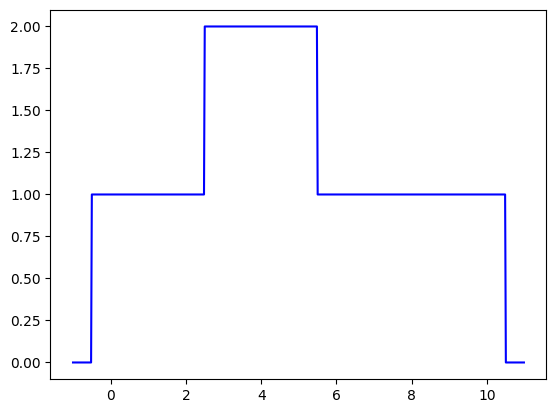

In [36]:
from numpy import arange, zeros_like
# Implementacja wzoru f(x) = sum_{n=0}^{N-1} f(n) * ϕ(x - n)
def interpolate_function(f_values, phi, x_range):
   N = len(f_values)
   interpolated_values = zeros_like(x_range)
   for n in range(N):
      interpolated_values += f_values[n] * phi(x_range - n)
   return interpolated_values

# Przykładowe użycie
x_range = arange(-1, len(f_), 0.02)
interpolated_values = interpolate_function(f_, Π, x_range)

# Rysowanie interpolowanej funkcji
splot(x_range, interpolated_values, color='blue')